In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main = pd.read_pickle("main.df")

In [2]:
# find and remove uncommon races from the data
print("Different tracks:")
print(main["venue"].value_counts())
print("\nDifferent classes:")
print(main["race_class"].value_counts())
print("\nDifferent distances:")
print(main["distance"].value_counts())

Different tracks:
ST    51946
HV    27501
Name: venue, dtype: int64

Different classes:
4     29418
3     25061
5     11409
2      7123
1      2665
11     1425
13     1157
12      611
6       475
0       103
Name: race_class, dtype: int64

Different distances:
1200    24697
1400    14565
1650    13253
1000     8524
1600     8329
1800     7320
2000     1463
2200     1034
2400      262
Name: distance, dtype: int64


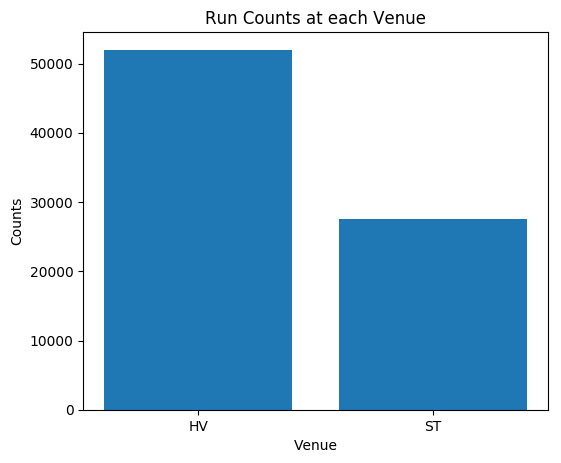

In [17]:
plt.figure(figsize=(6,5), dpi=100)
plt.bar(range(2), main["venue"].value_counts())
plt.xticks(range(2), np.unique(main["venue"]))
plt.title("Run Counts at each Venue")
plt.ylabel("Counts")
plt.xlabel("Venue")
plt.savefig('venue_counts.png')

In [3]:
print("Distances at ST:")
print(main.loc[main.venue=="ST"]["distance"].value_counts())

print("\nDistances at HV:")
print(main.loc[main.venue=="HV"]["distance"].value_counts())

Distances at ST:
1200    15104
1400    14526
1600     8293
1000     4628
1800     4347
1650     3183
2000     1463
2400      262
2200      140
Name: distance, dtype: int64

Distances at HV:
1650    10070
1200     9593
1000     3896
1800     2973
2200      894
1400       39
1600       36
Name: distance, dtype: int64


In [4]:
print("Classes at ST:")
print(main.loc[main.venue=="ST"]["race_class"].value_counts())

print("\nClasses at HV:")
print(main.loc[main.venue=="HV"]["race_class"].value_counts())

Classes at ST:
4     18486
3     15555
5      7068
2      5216
1      1917
11     1425
13     1090
12      611
6       475
0       103
Name: race_class, dtype: int64

Classes at HV:
4     10932
3      9506
5      4341
2      1907
1       748
13       67
Name: race_class, dtype: int64


In [5]:
# Remove:
# races at HV that have class 1, 13 or distance 2200, 1400, 1600
# races at ST that have class 12, 6, 0 or distance 2400, 2200

indexNames = main[( (main["venue"]=="HV") & 
                  (main["distance"].isin([2200,1400,1600]) | main["race_class"].isin([1, 13])) ) |
                  ( (main["venue"]=="ST") & 
                  (main["distance"].isin([2400, 2200]) | main["race_class"].isin([12, 6, 0])))].index
main.drop(indexNames, inplace=True)
main = main.reset_index(drop=True)
main.to_pickle("clean_main.df")

In [6]:
# Need to also deal with runners that did not finish the race (will assign them the average lengths behind
# for a dead last horse)
# Or we could just remove them from the running datasets

# First we count how many
len(main.loc[main["lengths_behind"]>=70])

100

In [7]:
# Not much, should just replace with average loser time
losers = main.loc[main["num_of_horses"]==main["result"]].copy()
# remove ones that will be replaced
dropIndexs = losers[losers["lengths_behind"]>=70].index
losers.drop(dropIndexs, inplace=True)
loser_lengths = np.mean(losers["lengths_behind"])

KeyError: 'num_of_horses'

In [8]:
# Set all values above 70 to this value (seems not that bad of a loser time?)
badIndexs = main[main["lengths_behind"]>=70].index
main.at[badIndexs, "lengths_behind"] = loser_lengths

len(main.loc[main["lengths_behind"]>=70])

NameError: name 'loser_lengths' is not defined

In [9]:
main = main.reset_index(drop=True)
main.to_pickle("clean_main_no_features.df")

In [10]:
len(main.loc[main["lengths_behind"]>=70])

100